# Objective:
The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content.

# About the Dataset:
This dataset consisting of 2225 instances has 2 columns:

1. Article: The content of article
2. Category: The category to which the Article belongs (Technology, Sports, Entertainment, Politics or Business). Needless to say, This is our target variable.

# How will we accomplish the classification of News Articles?

**•** We will clean the data (news articles) by performing preprocessing tasks such as removing punctuation, tockenization, removing stopwords and lemmatization

**•** We will use NLP techniques like BagOfWords and TF-IDF to convert the content of the articles into vectors.

<b>&#8226;</b> We will train different models like Naive Baye's, Decision Tree, Random Forest, K-Nearest Neighbours on the vectorized data and compare their performance.

# Import Data & Libraries

In [1]:
#Data loading and processing
import pandas as pd
import numpy as np

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Text Preprocessing
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Data encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#df = pd.read_csv('/content/drive/MyDrive/Projects/Flipit News/flipitnews-data.csv')
df = pd.read_csv('E:/1.SCALER/Classes/BusinessCase Studies/17.Business Case NLP FlipItNews/flipitnews-data.csv')
df.sample(10)

,Category,Article
2073,Sports,koubek suspended after drugs test stefan koube...
1244,Business,uk house prices dip in november uk house price...
1971,Sports,thanou desperate to make return greek sprinter...
253,Technology,first look at playstation 3 chip some details ...
565,Politics,howard attacks pay later budget tory leader ...
1747,Sports,running around the olympics it was back to off...
292,Entertainment,christmas song formula unveiled a formula for...
1739,Sports,collins to compete in birmingham world and com...
450,Politics,labour in constituency race row labour s choic...
71,Business,singapore growth at 8.1% in 2004 singapore s e...


# Data Analysis & Preprocessing

### Shape of the dataset

In [3]:
df.shape

(2225, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


Our dataset has two attributes:
* **Article:** The content of news articles
* **Category:** The category that each article belongs to, which is also the target variable

There are 2225 articles in the dataset

### News articles per category

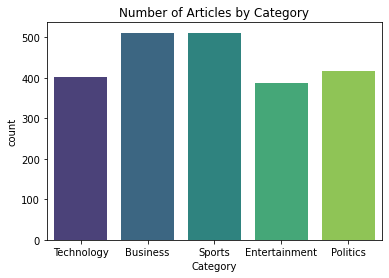

In [5]:
# Distribution of articles by category

sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Number of Articles by Category')
plt.show()

It can be observed that the number of articles across categories is almost equally distributed, with business and sports having 500 articles while the other categories having around 400.

# Processing the Textual Data i.e. the news articles

In [6]:
# Example Article
df.Article[0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

We observe many noise elements such as double spacing, hyphens and other symbols. Lets clean the data and tokenise it.

### Removing the non-letters

In [7]:
# Remove non-letters
def remove_non_letters(text):
  punctuation_pattern = re.compile(r'[^A-Za-z\s]')
  cleaned_text = re.sub(punctuation_pattern, '', text)
  return cleaned_text

df['Article']=df['Article'].apply(remove_non_letters)

In [8]:
# Review a sample after cleaning
df['Article'][0]

'tv future in the hands of viewers with home theatre systems  plasma highdefinition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices  one of the most talkedabout technologies of ces has been digital and personal video recorders dvr and pvr these settop boxes  like the us s tivo and the uk s sky system  allow people to record  store  play  pause and forward wind tv programmes when they want  essentially  the technology allows for much more personalised tv they are also being builtin to highdefinition tv

### Tokenizing the text & Removing stopwords

In [9]:
# Tokenize the text and remove stopwords

def remove_stopwords(text):
  words = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if w.lower() not in stop_words]
  return words

df['Article'] = df['Article'].apply(remove_stopwords)

In [10]:
# Review a sample after tokenisation
print(df['Article'][0])

['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'highdefinition', 'tvs', 'digital', 'video', 'recorders', 'moving', 'living', 'room', 'way', 'people', 'watch', 'tv', 'radically', 'different', 'five', 'years', 'time', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'las', 'vegas', 'discuss', 'new', 'technologies', 'impact', 'one', 'favourite', 'pastimes', 'us', 'leading', 'trend', 'programmes', 'content', 'delivered', 'viewers', 'via', 'home', 'networks', 'cable', 'satellite', 'telecoms', 'companies', 'broadband', 'service', 'providers', 'front', 'rooms', 'portable', 'devices', 'one', 'talkedabout', 'technologies', 'ces', 'digital', 'personal', 'video', 'recorders', 'dvr', 'pvr', 'settop', 'boxes', 'like', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'people', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'tv', 'programmes', 'want', 'essentially', 'technology', 'allows', 'much', 'personalised', 'tv', 'also',

### Lemmatization

In [11]:
# Perform Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
  result = [lemmatizer.lemmatize(token) for token in tokens]
  return result

df['Article'] = df['Article'].apply(lemmatize_text)

In [12]:
# Review a sample after lemmatization
print(df['Article'][0])

['tv', 'future', 'hand', 'viewer', 'home', 'theatre', 'system', 'plasma', 'highdefinition', 'tv', 'digital', 'video', 'recorder', 'moving', 'living', 'room', 'way', 'people', 'watch', 'tv', 'radically', 'different', 'five', 'year', 'time', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'la', 'vega', 'discus', 'new', 'technology', 'impact', 'one', 'favourite', 'pastime', 'u', 'leading', 'trend', 'programme', 'content', 'delivered', 'viewer', 'via', 'home', 'network', 'cable', 'satellite', 'telecom', 'company', 'broadband', 'service', 'provider', 'front', 'room', 'portable', 'device', 'one', 'talkedabout', 'technology', 'ce', 'digital', 'personal', 'video', 'recorder', 'dvr', 'pvr', 'settop', 'box', 'like', 'u', 'tivo', 'uk', 'sky', 'system', 'allow', 'people', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'tv', 'programme', 'want', 'essentially', 'technology', 'allows', 'much', 'personalised', 'tv', 'also', 'builtin', 'highdefinition', 

# Encoding and Transforming the data

### Encoding the target variable

In [13]:
# Label encoding of target variable

label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

df.sample(10)

,Category,Article
2102,4,"[hacker, threat, apple, itunes, user, apple, m..."
1266,2,"[blunkett, row, end, blair, prime, minister, t..."
1951,0,"[christmas, sale, worst, since, uk, retail, sa..."
1485,2,"[ready, information, act, thousand, public, bo..."
659,3,"[beckham, rule, management, move, real, madrid..."
722,3,"[rochus, shock, corium, auckland, top, seed, g..."
1252,4,"[blinx, sequel, purr, nicely, original, blinx,..."
56,0,"[ukraine, trim, privatisation, check, ukraine,..."
517,3,"[ireland, south, africa, ronan, gara, scored, ..."
439,2,"[lib, dems, target, stamp, duty, liberal, demo..."


### Train-Test Split

In [14]:
# Perform train-test split
X = df[['Article']]
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1780, 1)
y_train shape: (1780,)
X_test shape: (445, 1)
y_test shape: (445,)


### Bag of Words

In [16]:
# Bag of Words Vectorization
articles_train = X_train['Article'].apply(lambda x: ' '.join(x)).tolist()
articles_test = X_test['Article'].apply(lambda x: ' '.join(x)).tolist()

vectorizer = CountVectorizer()
bow_matrix_a = vectorizer.fit_transform(articles_train)
bow_matrix_b = vectorizer.transform(articles_test)
bow_train = pd.DataFrame(bow_matrix_a.toarray(), columns=vectorizer.get_feature_names_out())
bow_test = pd.DataFrame(bow_matrix_b.toarray(), columns=vectorizer.get_feature_names_out())

bow_train.head(10)

,aa,aaa,aac,aadc,aaltra,aamir,aara,aarhus,aaron,aashare,...,zonealarm,zoom,zooropa,zornotza,zorro,zubair,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [17]:
#TF-IDF vectorization
tf_idf = TfidfVectorizer()
tfidf_a = tf_idf.fit_transform(articles_train).todense()
tfidf_b = tf_idf.transform(articles_test).todense()
tf_train = pd.DataFrame(tfidf_a, columns=tf_idf.get_feature_names_out())
tf_test = pd.DataFrame(tfidf_b, columns=tf_idf.get_feature_names_out())

tf_train.head(10)

,aa,aaa,aac,aadc,aaltra,aamir,aara,aarhus,aaron,aashare,...,zonealarm,zoom,zooropa,zornotza,zorro,zubair,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Training & Evaluation

## Simple Approach

### 1. Naive Bayes

Lets train a Naive Bayes classifier using Bag of Words vectorization and evaluate the performance

In [18]:
# Create a Multinomial Naive Bayes classifier
naive_bayes_bow = MultinomialNB()

# Train the classifier
naive_bayes_bow.fit(bow_train, y_train)

# Make predictions on the test set
y_pred_bow = naive_bayes_bow.predict(bow_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_bow)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_bow))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       101
           1       1.00      0.90      0.95        81
           2       0.91      0.99      0.95        83
           3       0.99      1.00      0.99        98
           4       0.93      0.99      0.96        82

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



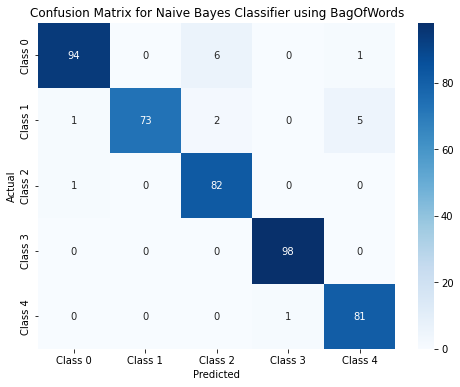

In [19]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_bow)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier using BagOfWords')
plt.show()

Lets compare the results of above Bag of Words vectorization with tfidf vectorization using the same model

In [20]:
# Create a Multinomial Naive Bayes classifier
naive_bayes_tf = MultinomialNB()

# Train the classifier
naive_bayes_tf.fit(tf_train, y_train)

# Make predictions on the test set
y_pred_tf = naive_bayes_tf.predict(tf_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_tf)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_tf))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       101
           1       1.00      0.89      0.94        81
           2       0.92      0.99      0.95        83
           3       0.99      1.00      0.99        98
           4       0.95      0.99      0.97        82

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.97      0.96      0.96       445



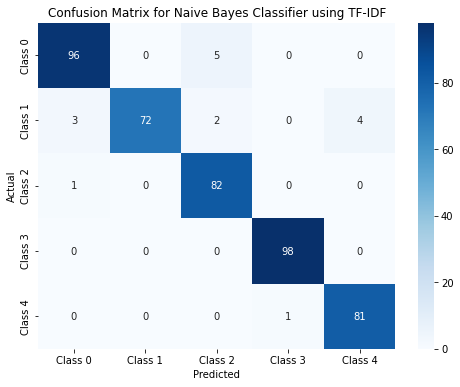

In [21]:
# Calculate the confusion matrix
conf_matrix_tf = confusion_matrix(y_test, y_pred_tf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier using TF-IDF')
plt.show()

We can observe that both BOW and TF-IDF approaches have a similar result. The confusioni matrix shows that both methods have very few missclassifications with an accuracy and average F1 score of 96%

## Functionalized Code (Optional)

### 1. Decision Tree

Accuracy: 0.84


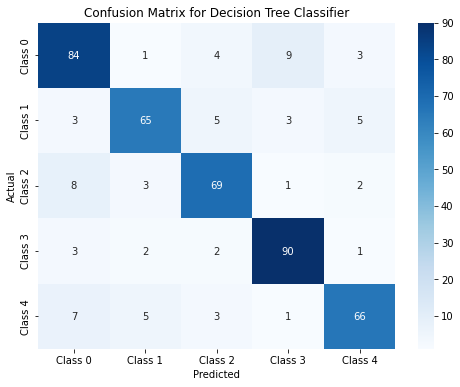

In [22]:
# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the classifier
decision_tree.fit(bow_train, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree.predict(bow_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

The accuracy of decision tree model at 84% is much lower than that of Naive Baye's classifier

### 2. K Nearest Neighbors

Accuracy: 0.93


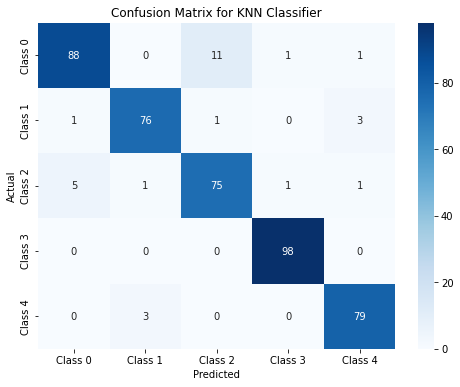

In [23]:
# Create KNeighborsClassifier instance
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit to the training data
knn_classifier.fit(tf_train, y_train)

# Predict on new data
y_pred_knn = knn_classifier.predict(tf_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

The KNN classifier shows good results (93% accuracy) with TF-IDF vectorization because it takes into consideration the uniqueness of the words with respect to the articles.

### 3. Random Forest

Accuracy: 0.95


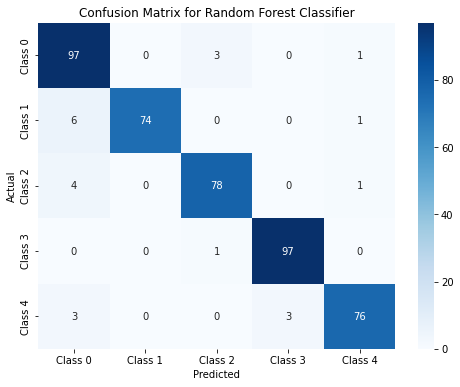

In [24]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Train the classifier
random_forest.fit(bow_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(bow_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

A random Forest Model (ensemble of decision trees) gives the same accuracy of 96% as Naive Baye's.

# Questionnaire:

**Q1.** How many news articles are present in the dataset that we have?  
Ans1. 2225 articles are present in the dataset  

**Q2**. Most of the news articles are from _____ category.  
Ans2. Sports category has the maximum number (511) of articles  

**Q3**. Only ___ no. of articles belong to the ‘Technology’ category.  
Ans3. Only 401 articles belong to the technology class  

**Q4**. What are Stop Words and why should they be removed from the text data?  
Ans4. Stop words are words like I, you, and, because (pronouns, articles, conjunctions etc) which don't really add significance to the analysis of the document. They must be removed because they occur in high frequency but don't add value to the analysis.  

**Q5**. Explain the difference between Stemming and Lemmatization.  
Ans5. Stemming refers to simply truncating variations of the same words whereas lemmatization converts them to their actual root form. Lemmatization is more preferable because stemming words might result in words which don't even exist.  

**Q6**. Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?  
Ans6. The TF-IDF technique is more nuanced as it not only contains the information of normalised term frequency within a document (article), but also the number of documents the term appears in.  

**Q7**. What’s the shape of train & test data sets after performing a 75:25 split.
Ans7. The shape of train data is (1668,1) and test data is (557,1) after performing a 75:25 split.   

**Q8**. Which of the following is found to be the best performing model..  
a. Random Forest b. Nearest Neighbors c. Naive Bayes  
Ans 8. Naive Bayes is the best performing model. Random Forest is also close in terms of performance.  

**Q9**. According to this particular use case, both precision and recall are equally important. (T/F)  
Ans9. True. Precision and Recall are both equally important. So F1 score is a better metric to look at.

# Conclusion

* The models which yielded the best accuracy of 96% were Naive Baye's Classifier and Random Forest Classifier
* The different approaches to vectorize the data (BagofWords and TF-IDF) did not create much difference in the performance of models used - except for KNN Classifier. It was observed that KNN classifier yielded much higher accuracy with TF-IDF.
* Overall, we were able to achieve a good accuracy even with a small dataset of 2225 articles as we were working on a balanced dataset with enough instances of all classes for the model to train on.